# 주성분 분석
- 서로 연관되어 있는 변수들이 관측되었을때, 이 변수들이 전체적으로 가지고 있는 정보를 최대한 확보하는 적은 수의 새로운 변수를 생성하는 방법
- 차원을 줄이는 방법으로 성능 향상과 칼럼들의 결합에 목적이 있음.

In [2]:
# 설문지를 이용한 주성분 분석

data <- read.table("../R_yang/pasta.txt")

In [3]:
data

,noodle,dishes,sauce
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2
Ragu,4,4,3
Alfredo,1,2,1
Bechamel,3,3,2
Carbonara,5,5,3


In [4]:
# 다중 공선성 확인 :  너무 상관이 높아서 마치 쌍둥이인 데이터 찾기
cor(data)

,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


In [6]:
# 표준화 : 평균을 0으로 표준편차는 1로 변경

data1 <- scale(data)

In [9]:
summary(data1)

     noodle            dishes             sauce         
 Min.   :-1.3416   Min.   :-1.36311   Min.   :-1.31112  
 1st Qu.:-0.6708   1st Qu.:-0.51117   1st Qu.:-0.62106  
 Median : 0.0000   Median :-0.08519   Median : 0.06901  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6708   3rd Qu.: 0.97973   3rd Qu.: 0.58656  
 Max.   : 1.3416   Max.   : 1.19272   Max.   : 1.44914  

In [10]:
sd(data1[,3])

[1] 1

In [13]:
apply(data1, 2, sd)

noodle dishes  sauce 
     1      1      1

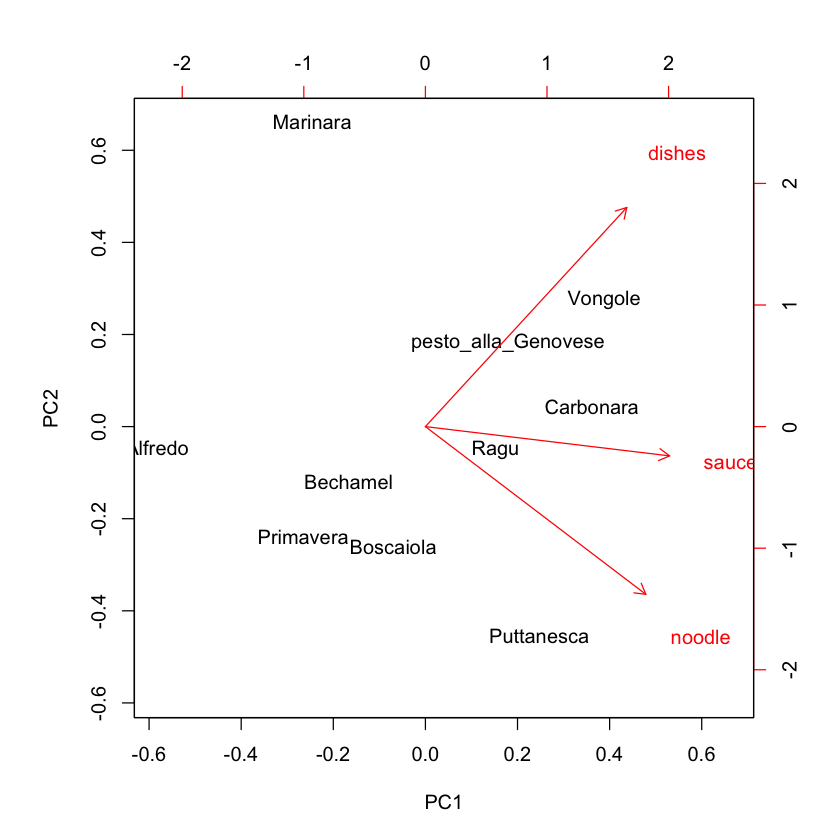

In [56]:
# 주성분 분석
p1 <- prcomp(data, scale=T)
biplot(p1)

In [33]:
라면 <- read.table("../R_yang/라면.txt", header = T)

In [59]:
head(라면)
라면2 <- 라면[,2:4]

X,면발,포장재,국물
3,2,4,5
8,5,2,1
4,3,4,3
2,3,3,5
5,1,2,3
6,1,3,4


In [45]:
라면$X <- as.numeric(라면$X)

In [50]:
noodle_data <- scale(라면)
cor(noodle_data)

,X,면발,포장재,국물
X,1.00000000,0.08908708,-0.4629100,-0.5039526
면발,0.08908708,1.00000000,-0.1443376,-0.5499719
포장재,-0.46291005,-0.14433757,1.0000000,0.5443311
국물,-0.50395263,-0.54997194,0.5443311,1.0000000


NULL

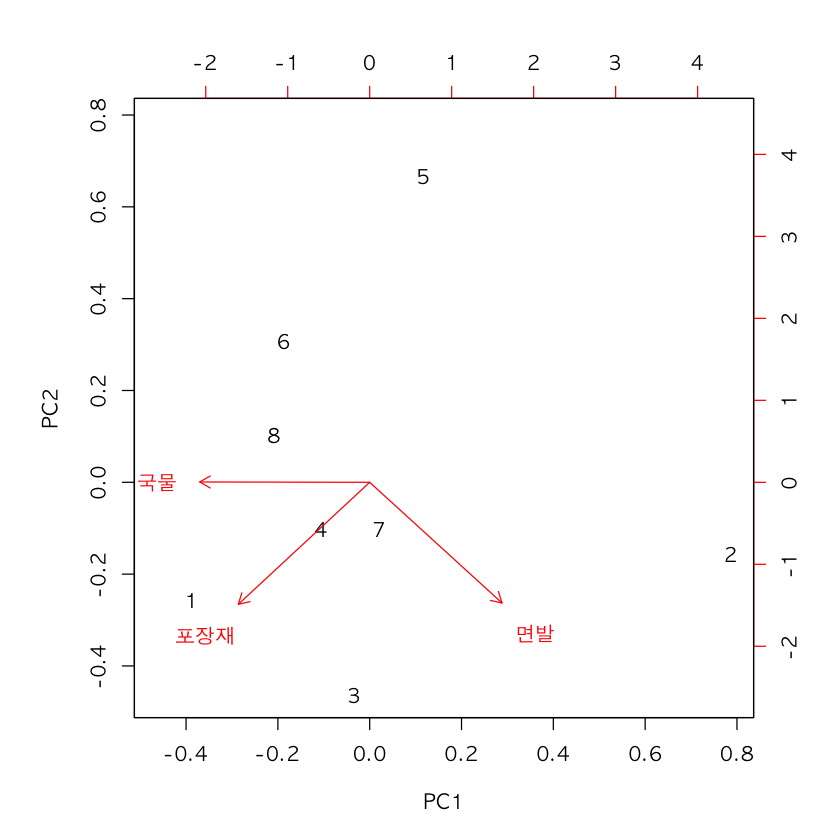

In [72]:
par(family = 'AppleGothic')
options(warn = -1)
p1 <- prcomp(라면2, scale=T)
colnames(p1)
biplot(p1)

In [ ]:
#USArrests
-1973년 미국 50개주에서 각각 10만명당 폭행, 살인, 강간으로 체포된 통계 데이터
-또한 도시지역에 살고 있는 인구의 비율도 주어진다.

In [61]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


- Murder : 살인
- Assualt: 폭행
- UrbanPop: 도시 인구밀도
- Rage: 강간

In [65]:
# 데이터의 상관관계
cor(USArrests)

,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


In [92]:
# 주성분 분석
result <- princomp(USArrests, cor=T)
summary(result)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

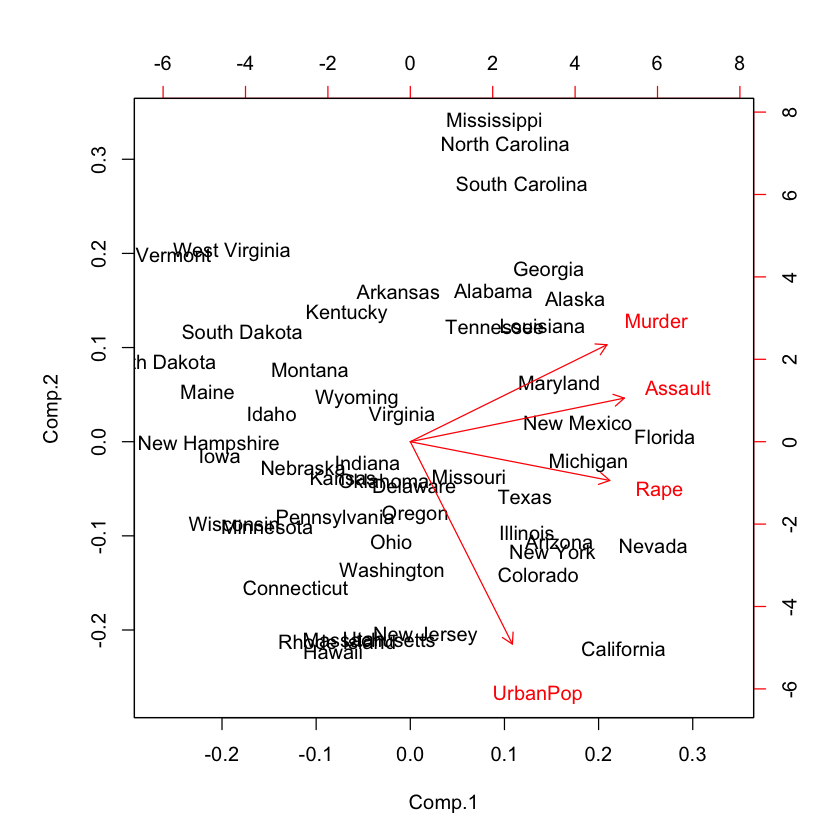

In [93]:
biplot(result)

In [94]:
result$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

1주성분 = 0.536 * Murder + 0.583 * Assalut + ...

In [95]:
# 1주성분으로 새로운 변수값 생성
score <- 0.536 * USArrests$Murder + 0.583 * USArrests$Assault + 0.278 * USArrests$UrbanPop + 0.543 * USArrests$Rape

In [100]:
Result <- data.frame(States=rownames(USArrests), Score=score)
head(Result)

States,Score
Alabama,172.2988
Alaska,196.1965
Arizona,214.8166
Arkansas,139.9753
California,213.0758
Colorado,165.8645


In [103]:
#우선순위 알아보기
library(dplyr)

In [102]:
head(arrange(Result, desc(Score)), 10)

States,Score
Florida,243.1211
North Carolina,224.6913
Arizona,214.8166
Maryland,214.6782
California,213.0758
New Mexico,209.1557
Nevada,200.9512
Alaska,196.1965
South Carolina,195.9369
Michigan,194.7819
